# 지도학습 연습문제

In [6]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib
%matplotlib inline
from preamble import *

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.5.2
IPython 5.1.0

sklearn 0.19.0
numpy 1.11.3
scipy 0.18.1
matplotlib 1.5.3


### 예제 1 
다음 X, y 데이터를 이용하여 KNN 회귀분석과 선형회귀 분석을 수행하고 테스트 데이터에 대한 점수를 비교하시오. <br>
( KNeighborsRegressor의 점수와 비교 = 0.83 )

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### 예제 2 
예제 1의 분석 결과를 시각화 하시오. <br>
(강의자료 'KNeighborsRegressor 분석' 참고)

### 예제 3
타이타닉 데이터 ( train2.csv )를 이용하여 훈련 데이터와 테스트 데이터의 로지스틱 회귀분석을 수행하시오.<br>
 - 800번째 데이터까지 훈련데이터로 사용하고
 - 801번부터 마지막까지 테스트데이터로 사용
 - 독립 (x), 종속 (y) 변수는 아래 설정된 x, y 변수를 활용)

In [15]:
df = pd.read_csv("data/train2.csv")

# 독립, 종속 변수 설정
x = ['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male']
y = ['Survived']



### 예제 4
예제 3에서 정의한 train, test 데이터를 이용해 max_depth=3인 의사결정트리를 그리고 특성 중요도를 출력하시오.

In [9]:
from sklearn.tree import DecisionTreeClassifier



### 예제 5
아래 코드는 SVM 모델을 학습하고 그로부터 그래프를 작성하는 코드이다. <br>
아래 빈칸 (점선 사이)에 X, y 데이터를 생성하고 linear 커널을 적용해 SVM 모델을 생성하시오.
    - X는 sepal length, sepal width
    - y는 target 변수값이 들어 있음 ( iris. + tab키를 통해 가져올수 있음 )

In [10]:
import matplotlib
matplotlib.use('GTKAgg')
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
 
iris = datasets.load_iris()
print(iris.feature_names)



# X, y 데이터 생성 및 SVC 모델 작성
#----------------------








#----------------------



# 그래프 작성
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')
 
plt.show()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


C:\Users\Park\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


IndexError: index 1 is out of bounds for axis 1 with size 1

### 예제 6
다음 forge 데이터에 대한 신경망 모델의 분류 결과를 시각화 하시오.<br>
 - 몇가지 alpha 값에 따른 분류 차이 확인
 - activation = tanh와 relu의 차이 확인
 - solver = 'lbfgs' 활용

In [11]:
from sklearn.neural_network import MLPClassifier
X, y = mglearn.datasets.make_forge()



<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br>

In [12]:
#### 1번
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

lr = LinearRegression().fit(X_train, y_train)

print("KNN 테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print("KNN 테스트 세트 점수: {:.2f}".format(reg.score(X_test, y_test)))
print("\n")
print("Linear 테스트 세트 예측:\n{}".format(lr.predict(X_test)))
print("Linear 테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

KNN 테스트 세트 예측:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]
KNN 테스트 세트 점수: 0.83


Linear 테스트 세트 예측:
[-0.748  0.258  0.803 -1.176 -1.602 -1.09   0.197  1.384 -0.308 -1.521]
Linear 테스트 세트 점수: 0.63


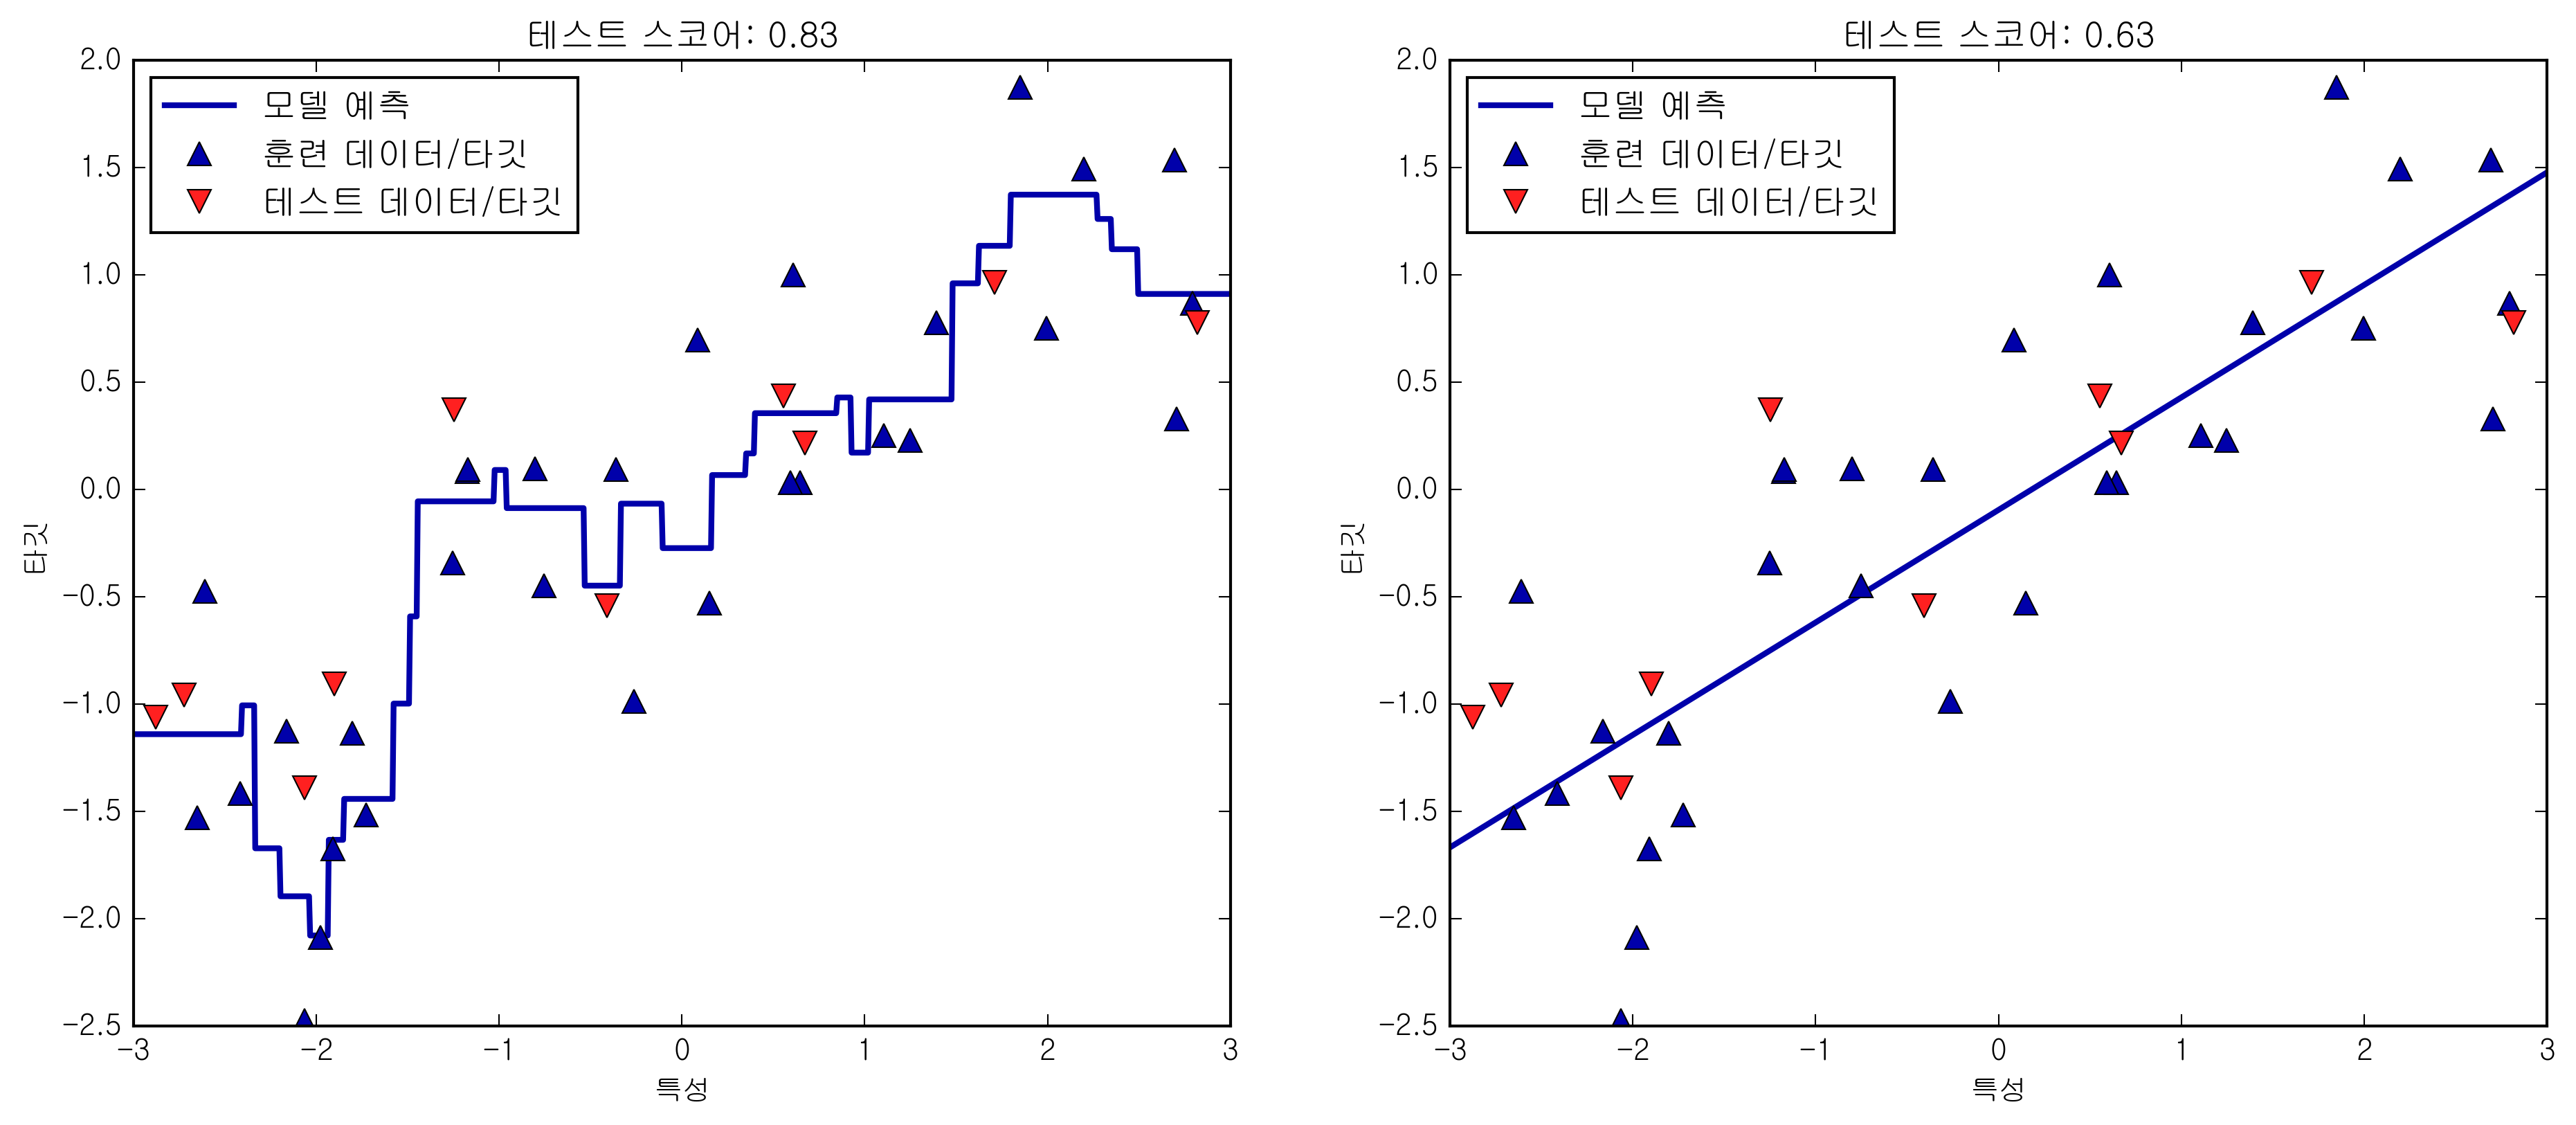

In [13]:
#### 2번
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

axes[0].plot(line, reg.predict(line))
axes[0].plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
axes[0].plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
axes[0].set_title("테스트 스코어: {:.2f}".format(reg.score(X_test, y_test)))
axes[0].set_xlabel("특성")
axes[0].set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

axes[1].plot(line, lr.predict(line))
axes[1].plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
axes[1].plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
axes[1].set_title("테스트 스코어: {:.2f}".format(lr.score(X_test, y_test)))
axes[1].set_xlabel("특성")
axes[1].set_ylabel("타깃")
axes[1].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

In [16]:
#### 3번
df = pd.read_csv("data/train2.csv")

# 독립, 종속 변수 설정
x = ['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male']
y = ['Survived']

keep = ['Survived', 'Age', 'Fare']

# 더미코딩
dummy_Pclass = pd.get_dummies(df['Pclass'], prefix='Pclass')
dummy_Sex = pd.get_dummies(df['Sex'], prefix='Sex')

data = df[keep].join(dummy_Pclass.ix[:,'Pclass_1':])
data = data.join(dummy_Sex.ix[:,'Sex_male':]) 

train_X = data.ix[:800, x] 
train_y = data.ix[:800, y].values.ravel()
test_X = data.ix[801:, x]
test_y = data.ix[801:, y]

log = LogisticRegression().fit(train_X, train_y)
test_y_pred = log.predict(test_X)

print("훈련 데이터 정확도: {:.3f}".format(log.score(train_X, train_y)))
print("테스트 데이터 정확도: {:.3f}".format(log.score(test_X, test_y)))

훈련 데이터 정확도: 0.795
테스트 데이터 정확도: 0.789


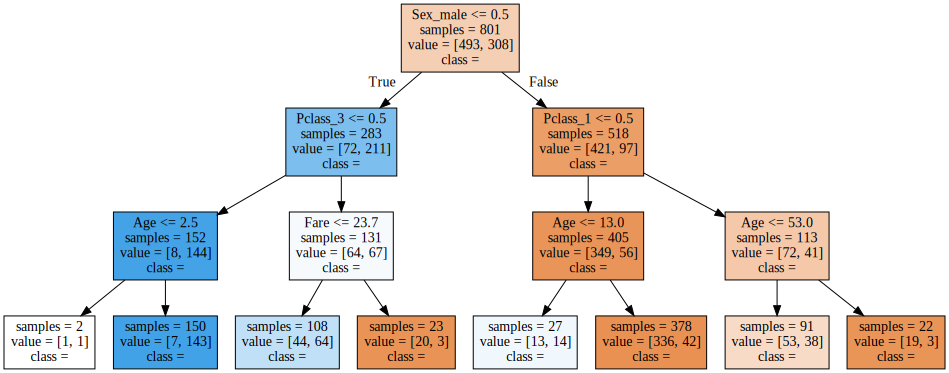

특성 중요도:
[ 0.071  0.048  0.052  0.     0.157  0.672]


In [17]:
#### 4번
#!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(train_X, train_y)

export_graphviz(tree, out_file="tree.dot", class_names=["생존", "사망"],
                feature_names=x, impurity=False, filled=True)

dot_graph = str(open("tree.dot", "rb").read(), "utf8")
display(graphviz.Source(dot_graph))

print("특성 중요도:\n{}".format(tree.feature_importances_))

C:\Users\Park\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


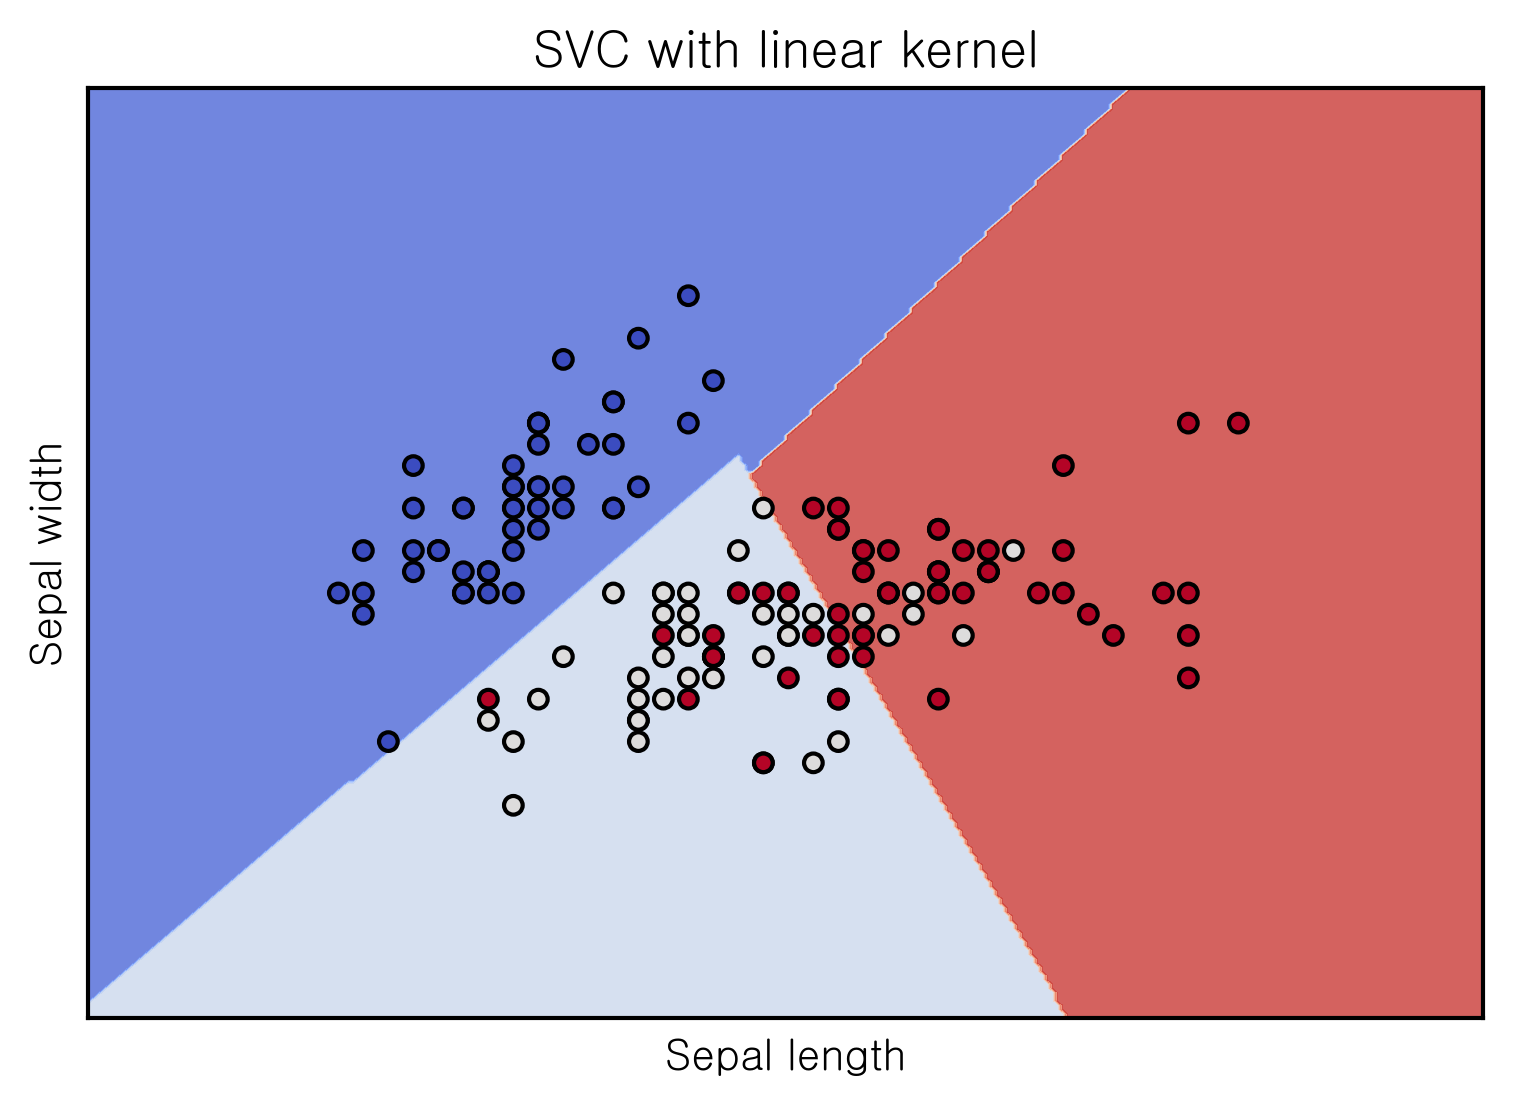

In [18]:
#### 5번
import matplotlib
matplotlib.use('GTKAgg')
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
 
iris = datasets.load_iris()
print(iris.feature_names)



# X, y 데이터 생성 및 SVC 모델 작성
#----------------------
X = iris.data[:, :2]
y = iris.target

svc = SVC(kernel='linear').fit(X, y)
#----------------------



# 그래프 작성
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')
 
plt.show()

MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

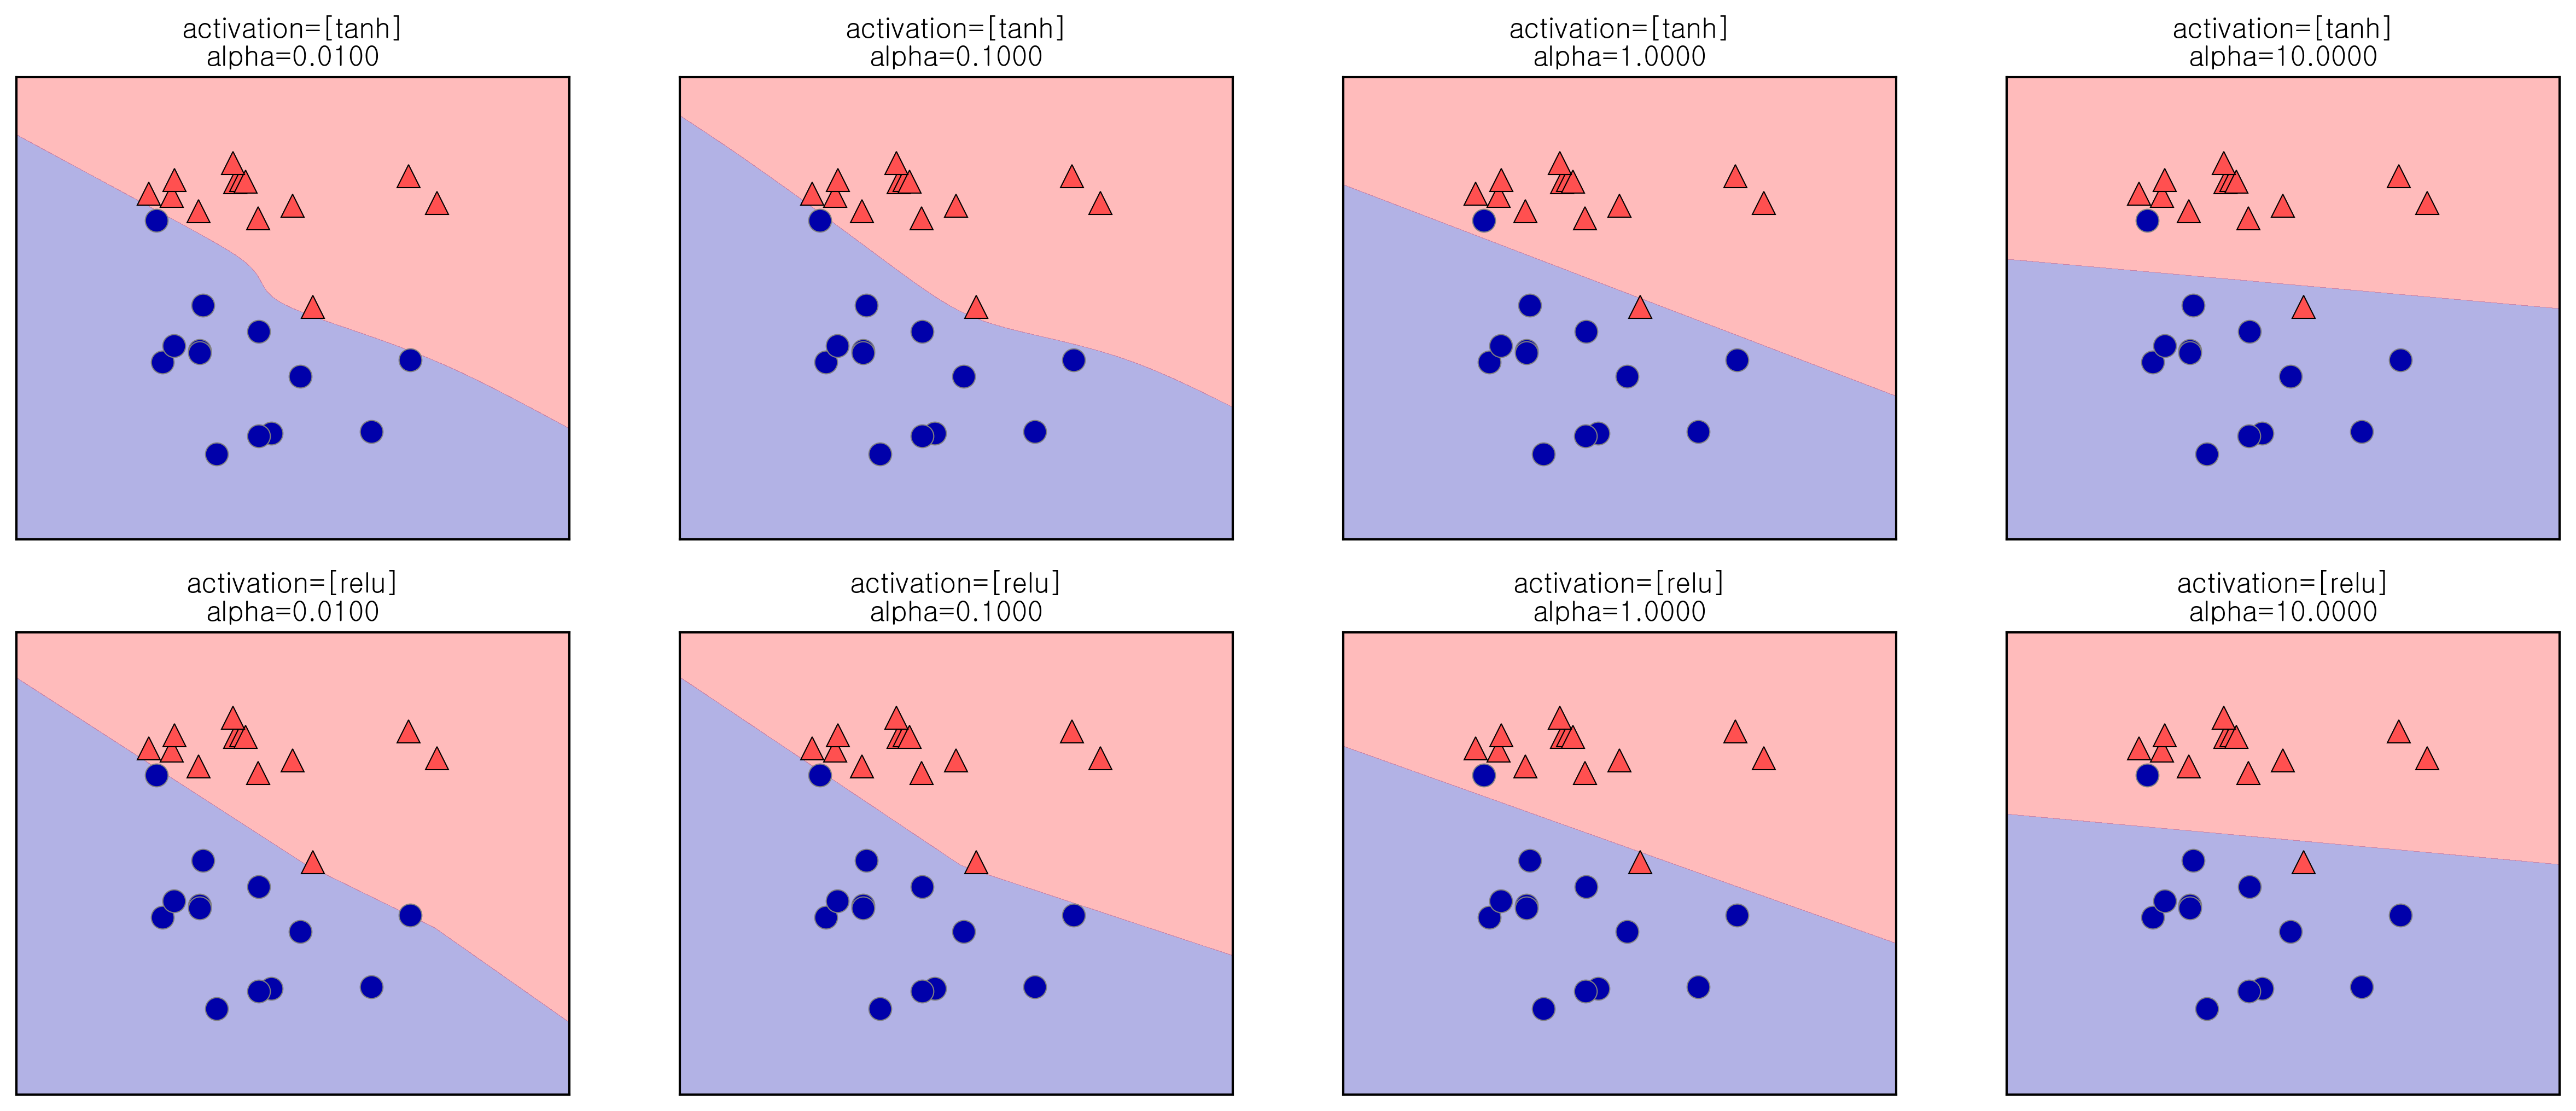

In [21]:
#### 6번

from sklearn.neural_network import MLPClassifier
X, y = mglearn.datasets.make_forge()


# 반복문 형태가 아니여도 MLPClassifier의 파라미터값을 변경하면서 차이 확인

activation = ['tanh', 'relu']
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, act in zip(axes, activation):
    for ax, alpha in zip(axx, [0.01, 0.1, 1, 10]):
        mlp = MLPClassifier(solver='lbfgs', activation = act, alpha=alpha, hidden_layer_sizes=[10], random_state=0)
        
        mlp.fit(X, y)
        mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
        ax.set_title("activation=[{}]\nalpha={:.4f}".format(act, alpha))
        

mlp.fit(X, y)